Загрузите данные по вариантам в ноутбук.

In [ ]:
import pandas as pd
data = pd.read_excel("Вариант 1.xlsx")
data.columns = data.iloc[1]
data.drop(axis=0, index=[0,1, data["Класс"].size -1], inplace=True)
data.reset_index(drop= True , inplace= True)

Сделайте описательную статистику полученных данных.

In [ ]:
data.describe()

1,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
count,3048,3048,3048,3048,3048,3048,3048,0,3048,3048,3048
unique,3048,24,13,2,34,2516,1352,0,51,51,1
top,1,152,11,Ж,340,2+++++5+++++++2++++++++-4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,49,80,24
freq,1,331,2428,1767,253,92,84,NaN,158,158,3048


Найдите процент учащихся, выполнивших работу ниже среднего.

In [ ]:
data[data["Балл"] < data["Балл"].mean()]["Балл"].count() / data["Балл"].count() * 100

51.27952755905512

Найти процент учащихся не сдавших экзамен.

In [ ]:
data[data["Балл"] < data["Минимальный балл"]]["Балл"].count() / data["Балл"].count() * 100


0.13123359580052493

Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

In [ ]:
import matplotlib.pyplot as plt

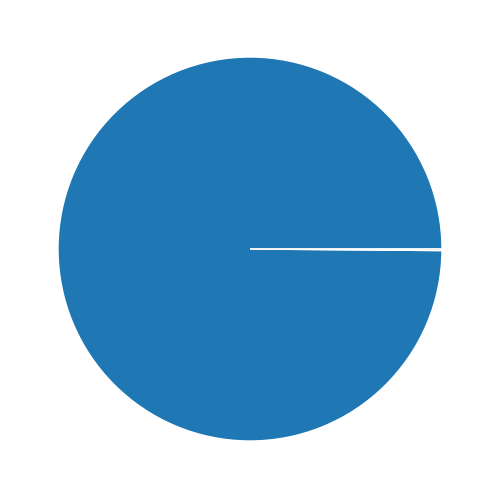

In [ ]:
dataPass = data[data["Балл"] >= data["Минимальный балл"]]["Балл"].count()
dataNoPass = data[data["Балл"] < data["Минимальный балл"]]["Балл"].count()

fig = plt.figure()
ax= fig.add_axes([1,1,1,1])
results = [dataPass, dataNoPass]

ax.pie(results, radius = 1)
plt.show()

Постройте ядерную оценку плотности распределению баллов за экзамен.

In [ ]:
import seaborn as sns

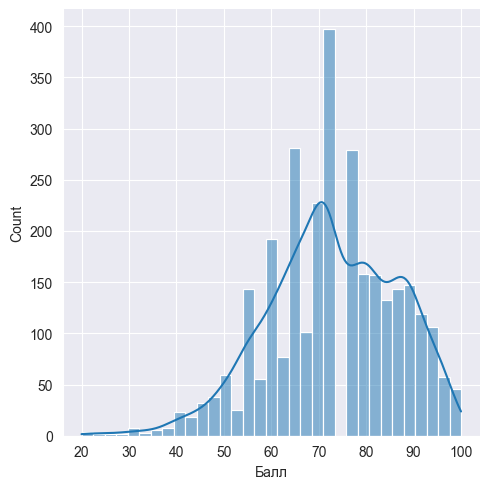

In [ ]:
sns.displot(data["Балл"], kde=True)

Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [ ]:
data["Оценка"] = data["Балл"].aggregate(
    lambda m: 2 if m < 51 else 3 if m < 71 else 4 if m < 85 else 5)

print((data.groupby("Оценка").size() / len(data)) * 100)


Оценка
2     5.643045
3    37.204724
4    32.513123
5    24.639108
dtype: float64


Какое процентное соотношение юношей и девушек писало данный экзамен?

In [ ]:
print((data.groupby("Пол").size() / len(data)) * 100)

Пол
Ж    57.972441
М    42.027559
dtype: float64


Сколько школ принимало участие в экзамене?

In [ ]:
len(data.groupby("№ школы"))

24

Сколько всего заданий с кратким ответом? С развернутым ответом?

In [ ]:
short_tasks = len(data['Задания с кратким ответом'][0])
long_tasks = int(len(data['Задания с развёрнутым ответом'][0].replace("(", "").replace(")", ""))/2)
print(short_tasks)
print(long_tasks)

25
12


Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: B1, ...Bk
 Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [ ]:
b_questions = data['Задания с кратким ответом']
for i in range(short_tasks):
    print(b_questions[b_questions.aggregate(lambda b: b[i] != "0" and b[i] != "-")].count())

3008
2831
2662
2356
1797
2762
2897
2304
2564
2953
2840
2302
2534
2139
2975
2102
2049
2261
2114
2522
2190
1465
2333
755
2909


Аналогично и с типом С (ответы с развернутым ответом

In [ ]:
c_questions = data['Задания с развёрнутым ответом']
for i in range(long_tasks):
    print(c_questions[c_questions.aggregate(lambda b: b[i*4] != "0")].count())

2949
2887
2879
2873
2940
2970
2816
2484
2566
2491
2987
2577


Сделайте анализ по двум школам:
по всем выполненным заданиям типа В
по заданиям типа С больше 50%
по среднему баллу юношей и девушек

In [ ]:
school1 = data.where(data["№ школы"] == 117).dropna(how="all")
school2 = data.where(data["№ школы"] == 148).dropna(how="all")

b_questions1 = school1['Задания с кратким ответом']
school1B = 0
for i in range(short_tasks):
    school1B += b_questions1[b_questions1.aggregate(lambda b: b[i] != "0" and b[i] != "-")].count()

b_questions2 = school2['Задания с кратким ответом']
school2B = 0
for i in range(short_tasks):
    school2B += b_questions2[b_questions2.aggregate(lambda b: b[i] != "0" and b[i] != "-")].count()

print(school1B, school2B)

1841 6384


In [ ]:
scl1 = school1[["Пол", "Балл"]].groupby("Пол").mean()
scl2 = school2[["Пол", "Балл"]].groupby("Пол").mean()
print("Школа 1")
print(scl1)
print()
print("Школа 2")
print(scl2)

Школа 1
1         Балл
Пол           
Ж    75.686275
М    65.022727

Школа 2
1         Балл
Пол           
Ж    75.745856
М    68.166667
